In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1611,2020-09-12,United Kingdom,360312.0,361677.0,41648.0,41614.0,-1365.0,34.0
1612,2020-09-12,Germany,258509.0,258480.0,9350.0,9347.0,29.0,3.0
1613,2020-09-12,Iran,399301.0,397801.0,23033.0,22913.0,1500.0,120.0
1614,2020-09-12,Turkey,287804.0,288126.0,6939.0,6951.0,-322.0,-12.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  9605.878712871287
RMSE =  36669.23737613757


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  303.5625
RMSE =  747.8036036147512


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  69157.43137254902
RMSE =  115552.25485476087
-- World performances for deaths --
MAE =  1733.7058823529412
RMSE =  2106.9915811117557


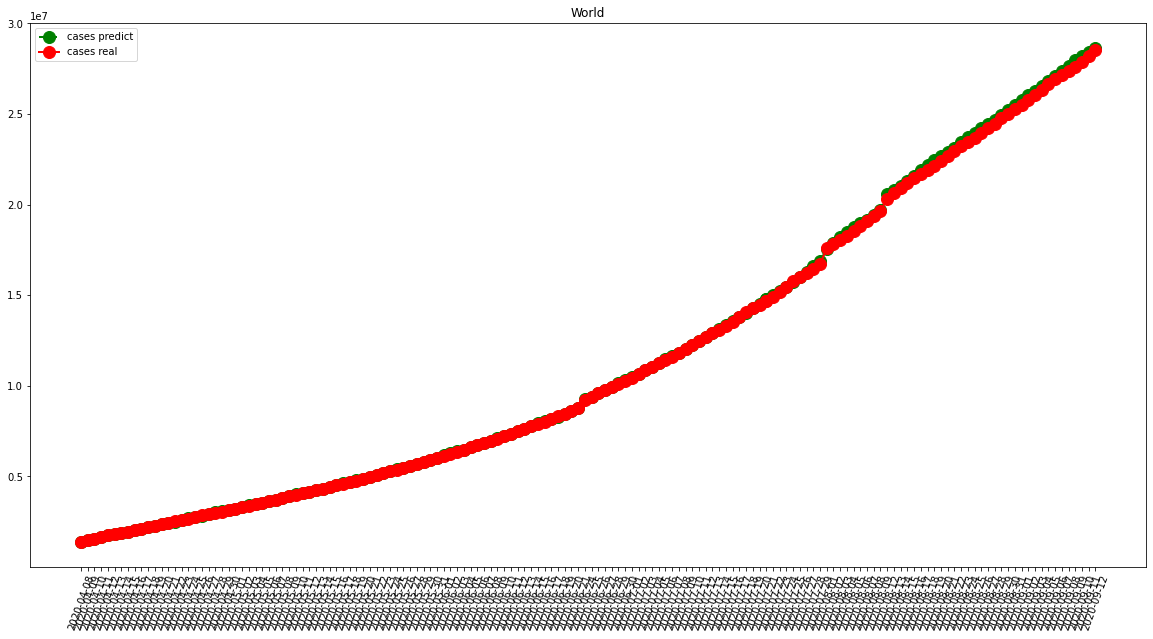

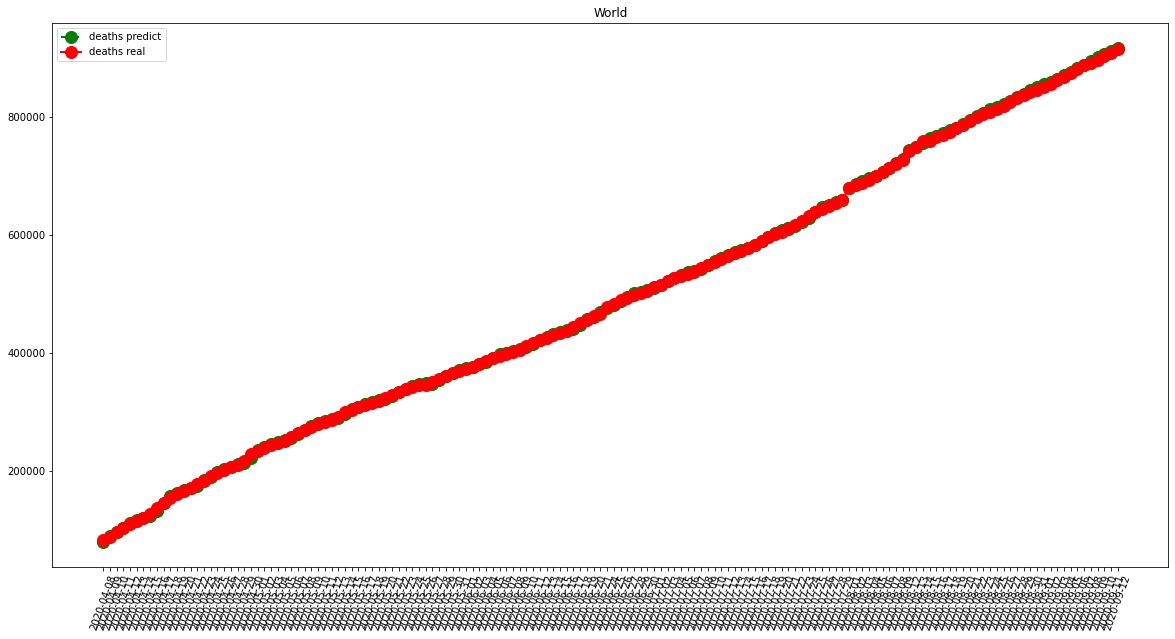

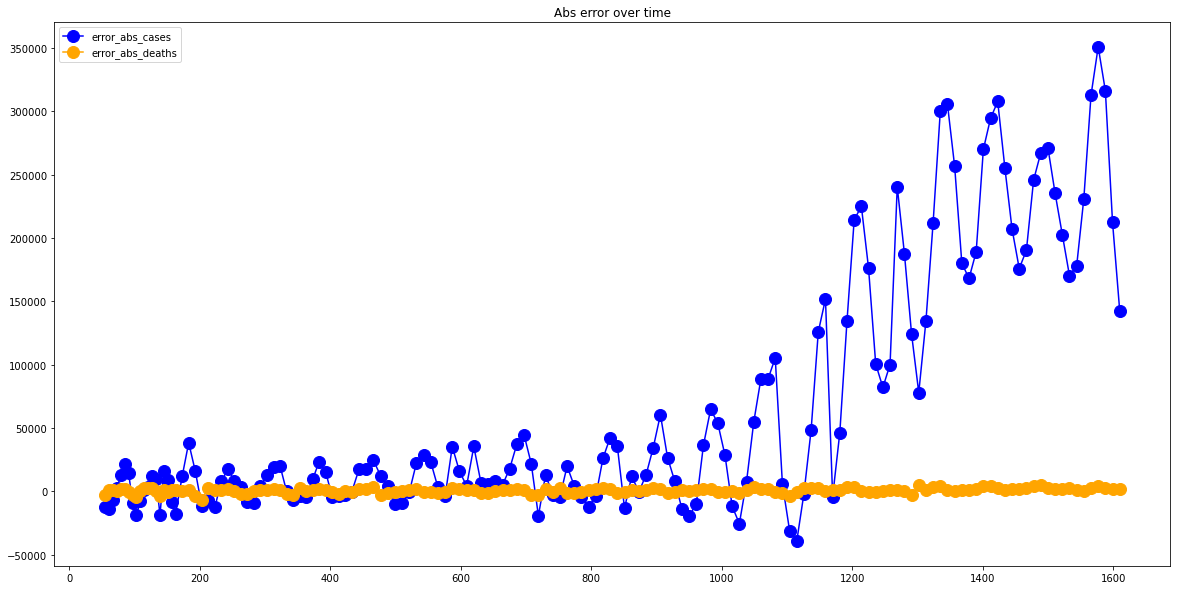

In [7]:
visShow("World")

-- France performances for cases --
MAE =  1075.760736196319
RMSE =  1602.9269412986682
-- France performances for deaths --
MAE =  115.87116564417178
RMSE =  262.80192685887255


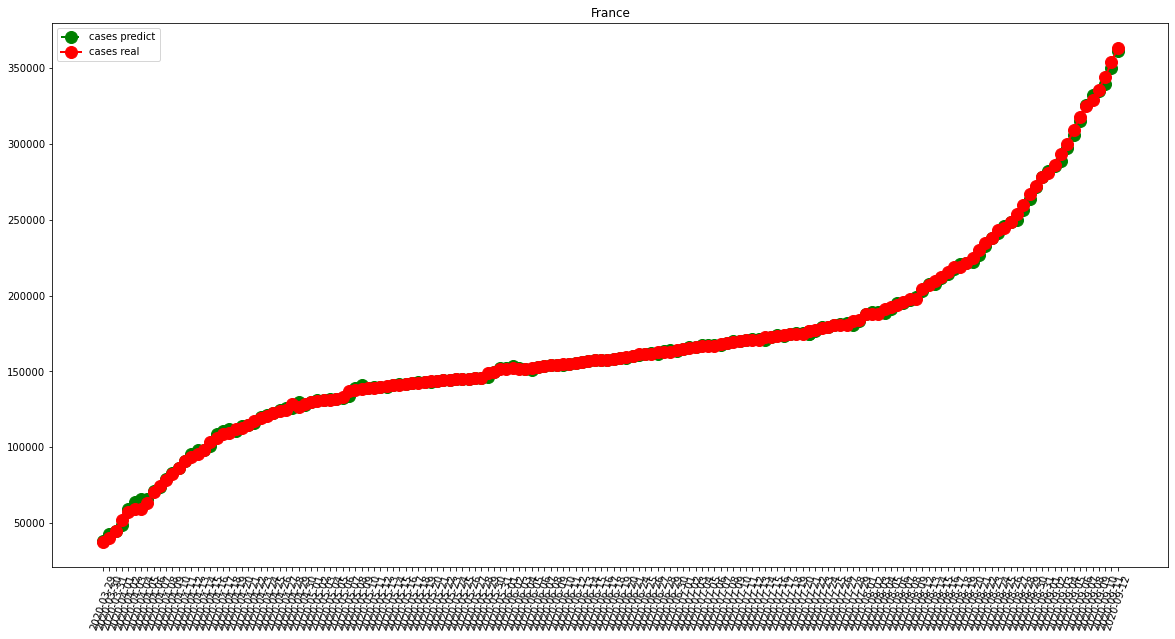

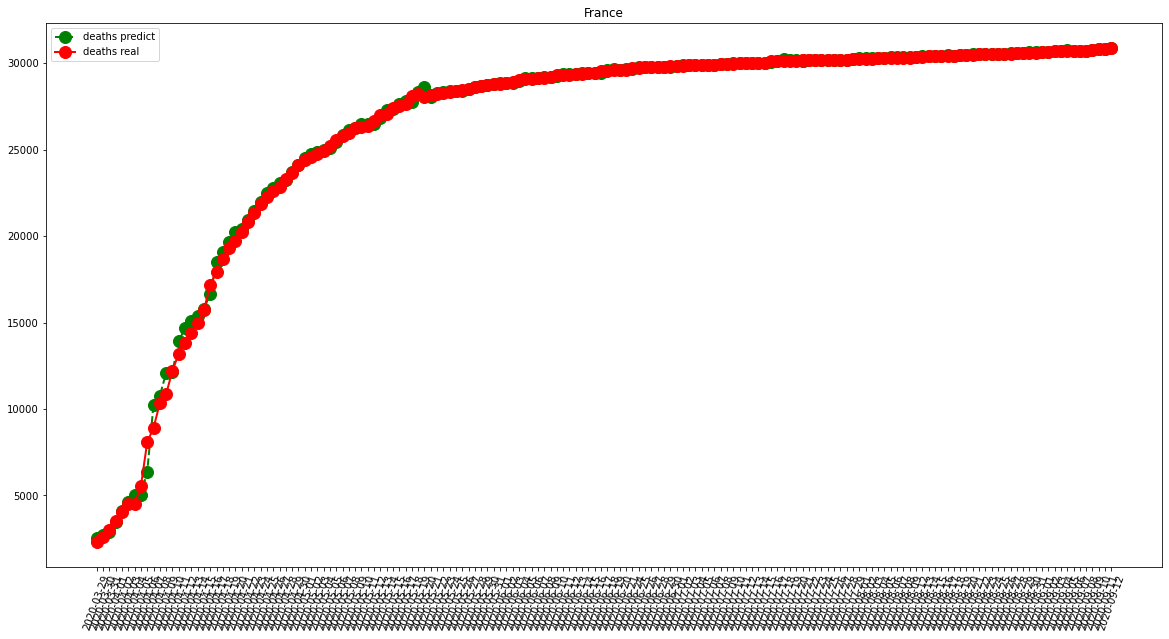

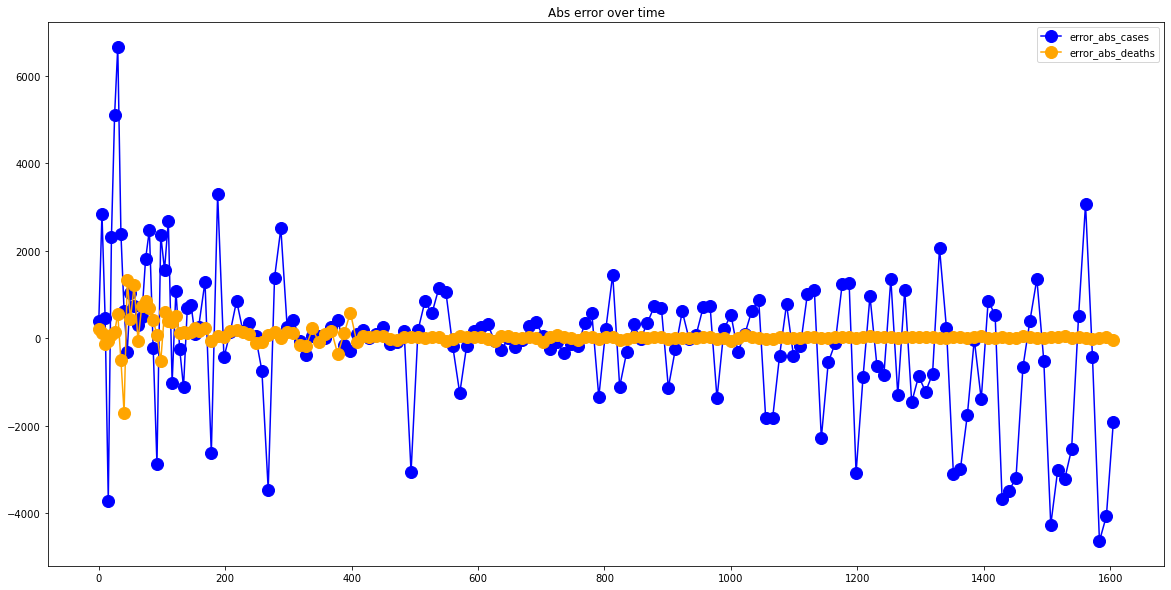

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  306.5153374233129
RMSE =  452.0032846397837
-- Italy performances for deaths --
MAE =  69.50920245398773
RMSE =  232.55523784749883


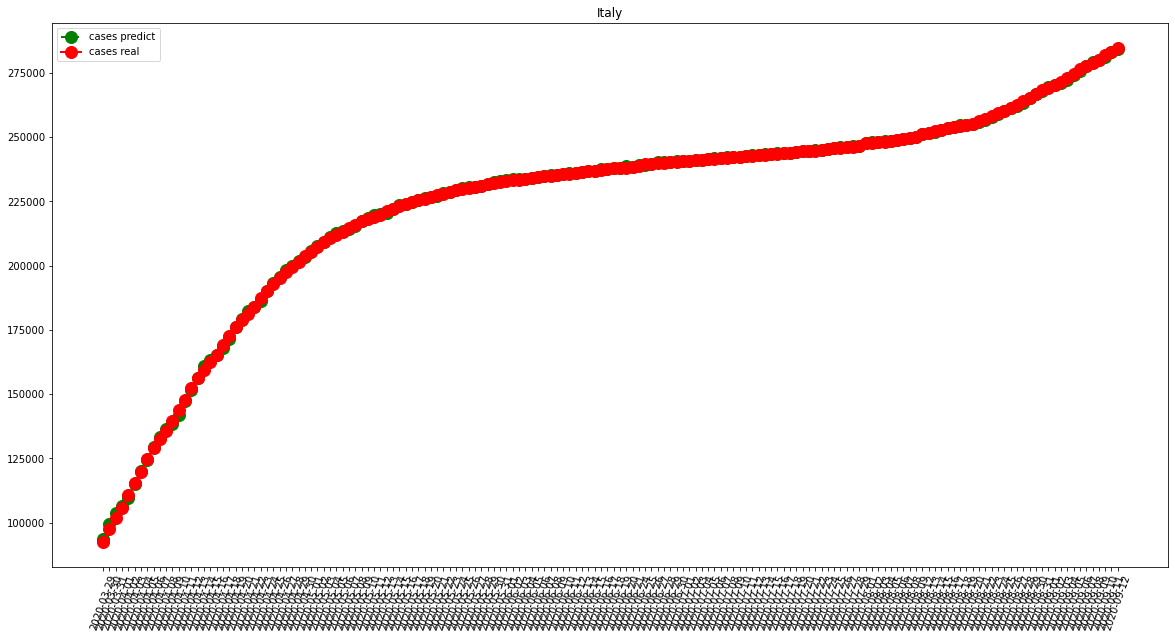

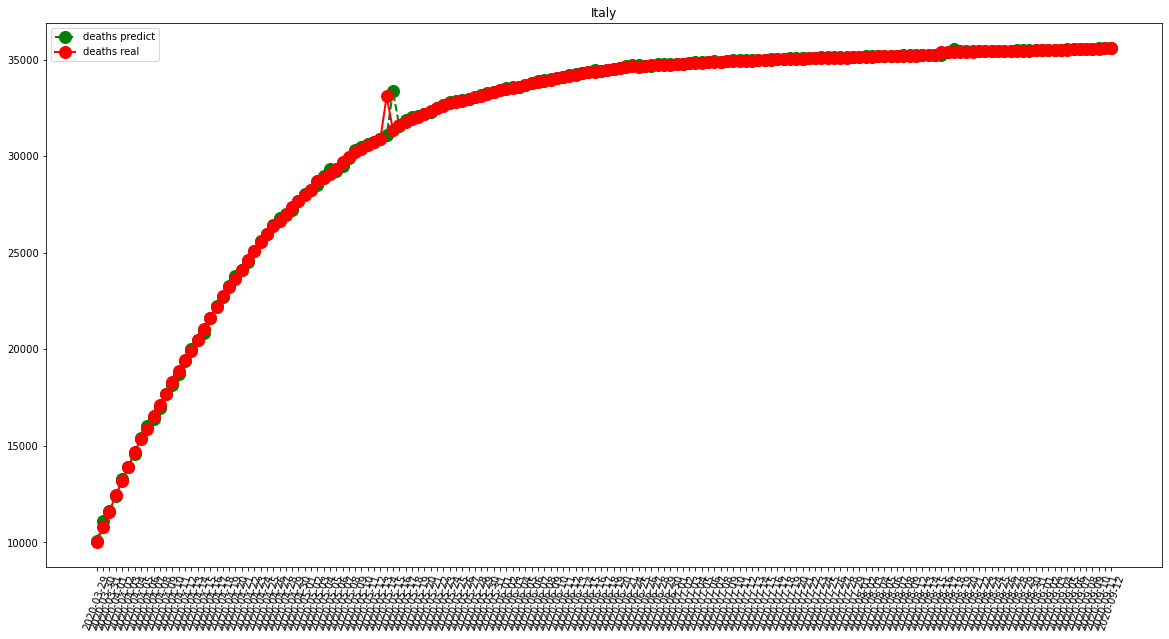

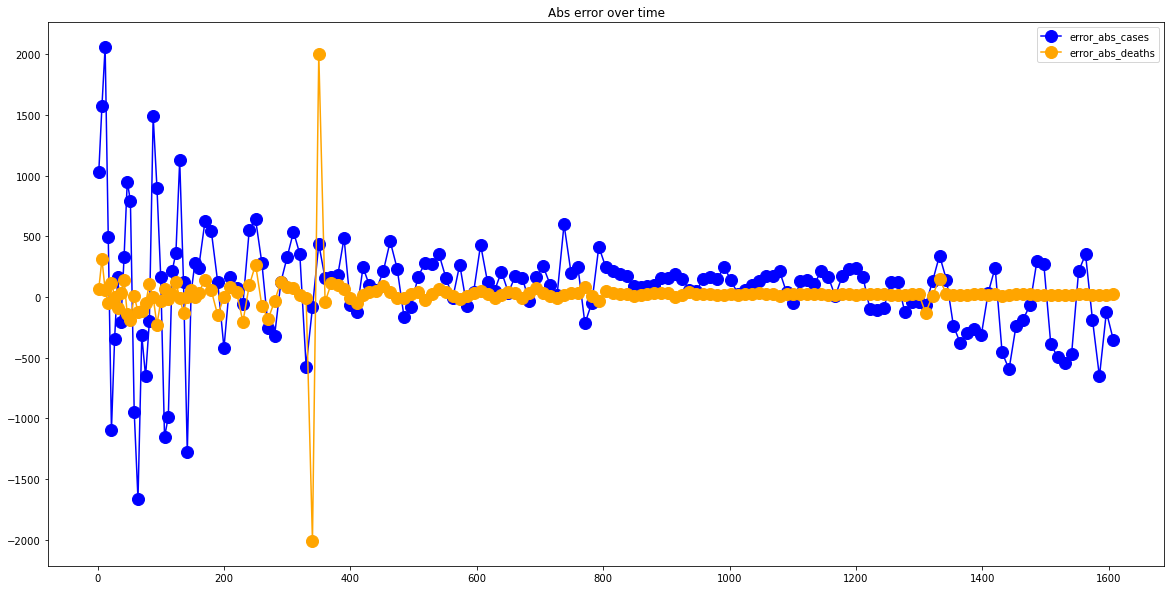

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  2249.5398773006136
RMSE =  4391.1453870050755
-- Spain performances for deaths --
MAE =  121.76687116564418
RMSE =  318.8797877232185


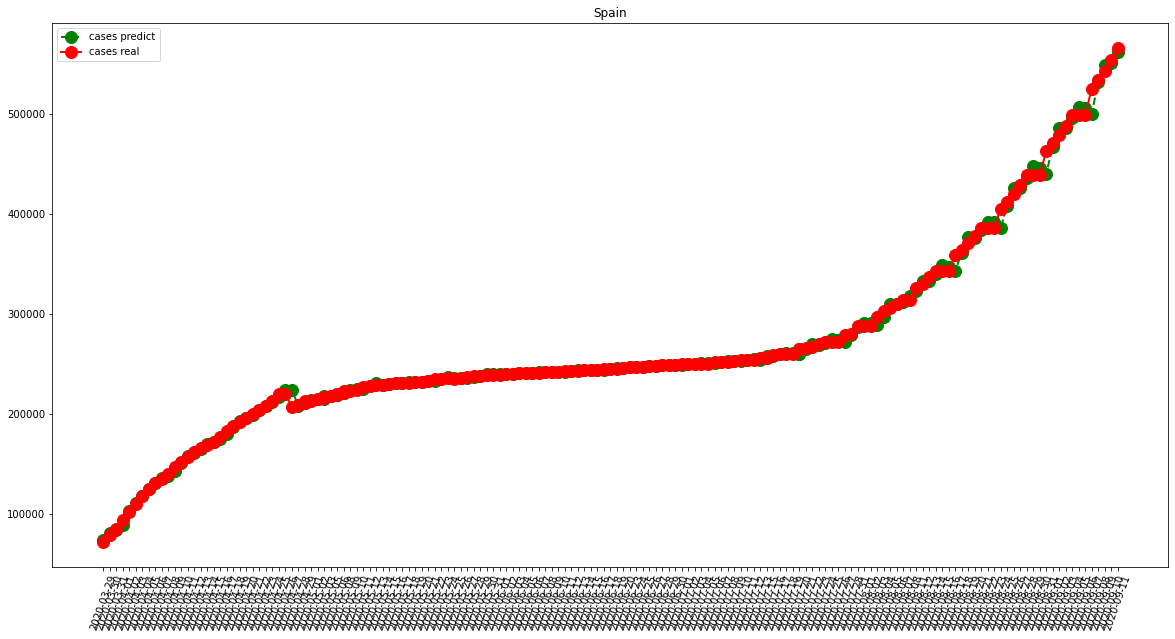

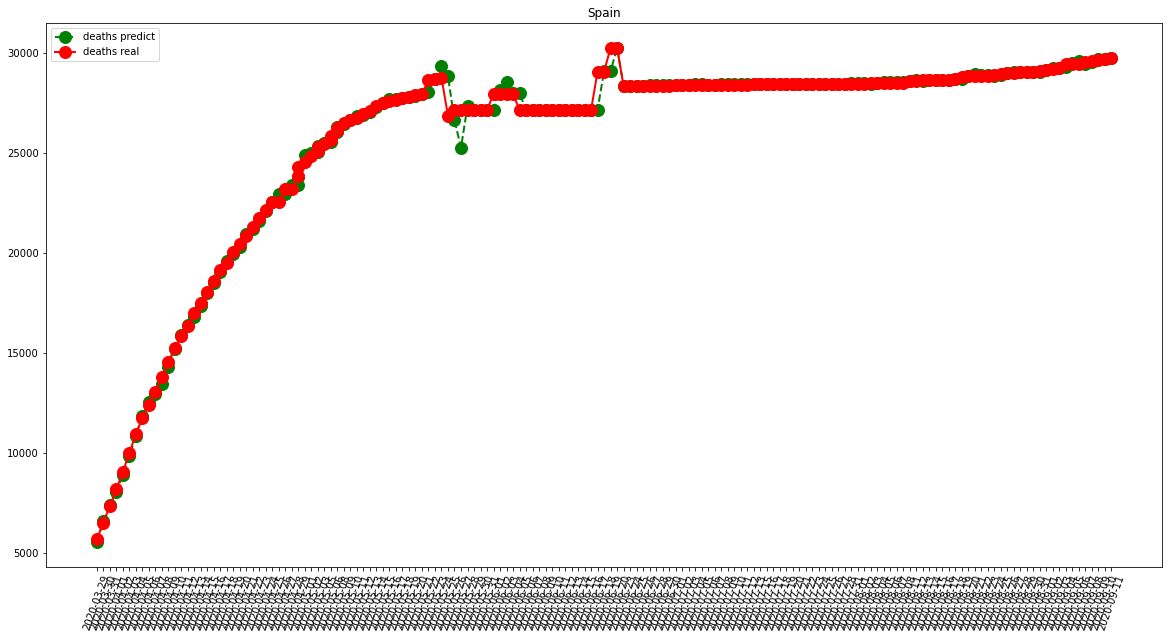

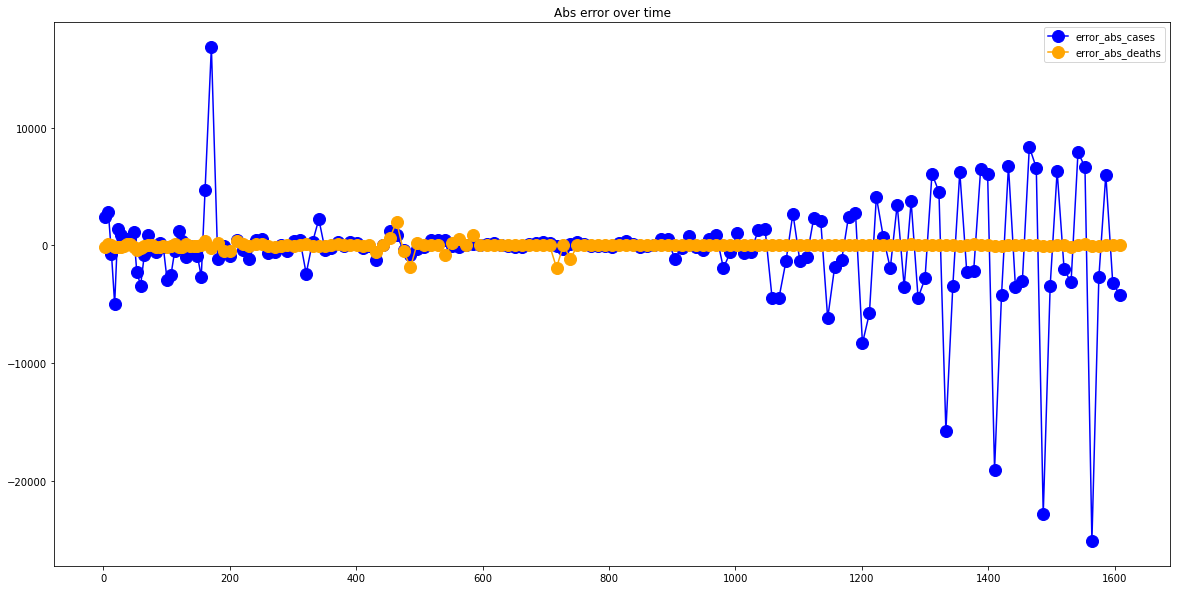

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  14385.938650306749
RMSE =  22028.214161413638
-- United States performances for deaths --
MAE =  481.3558282208589
RMSE =  679.0312343168863


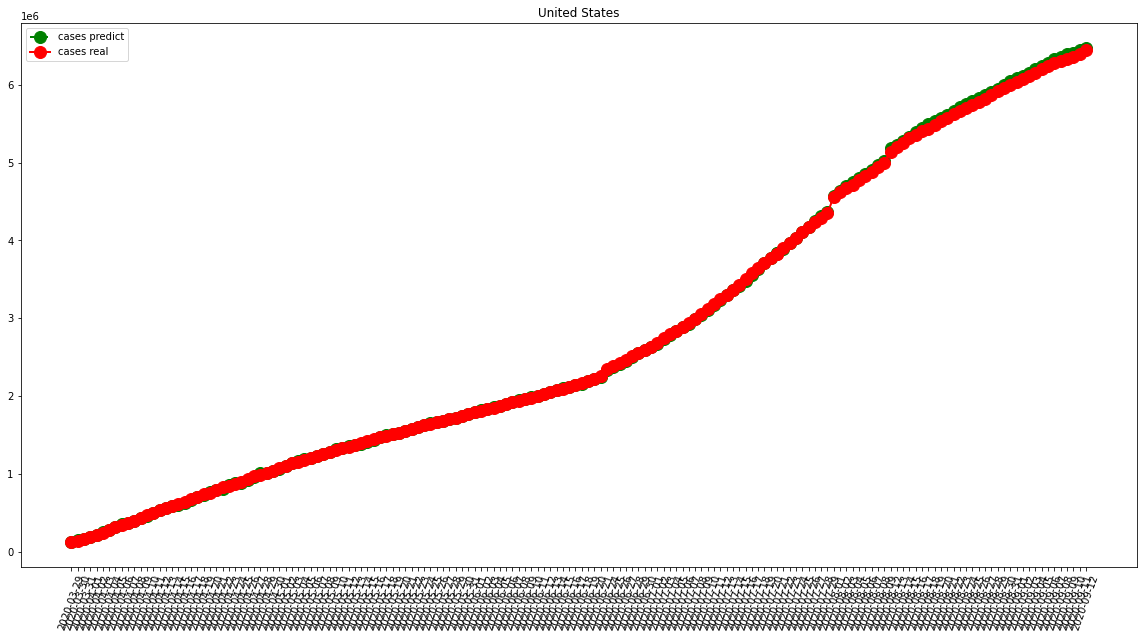

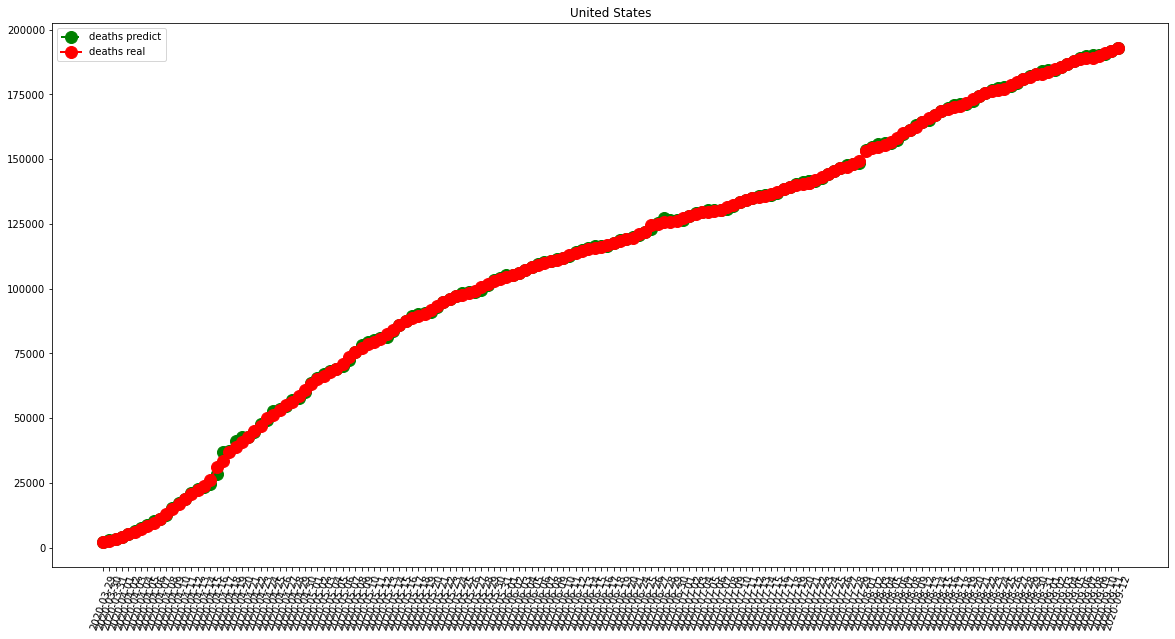

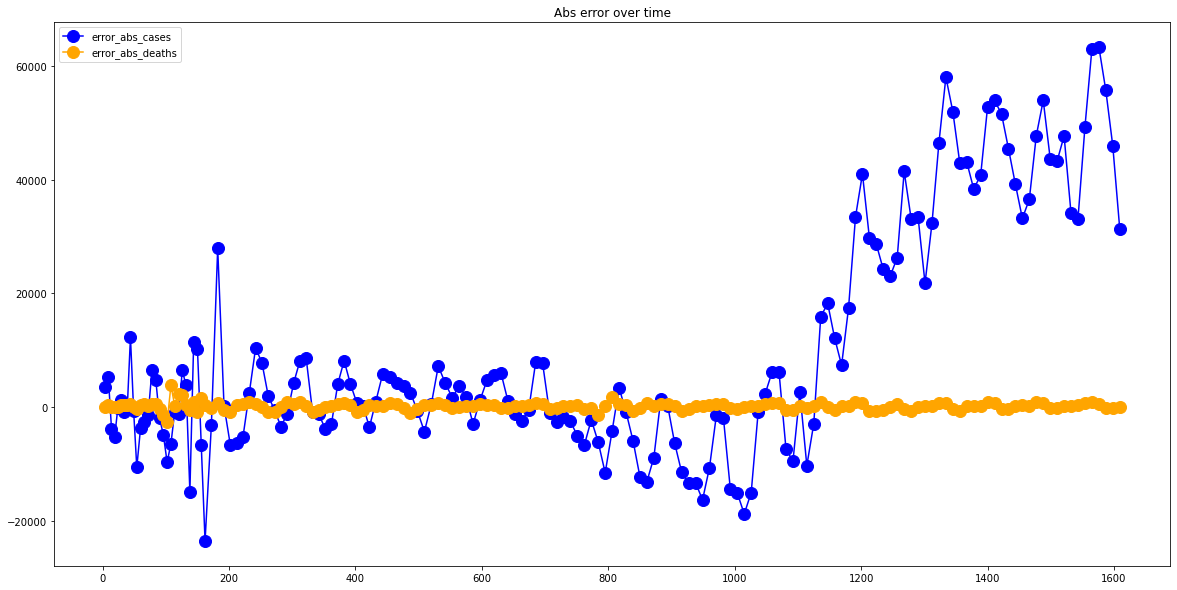

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  61.97546012269939
RMSE =  93.49361055560924
-- China performances for deaths --
MAE =  25.920245398773005
RMSE =  122.99830414312991


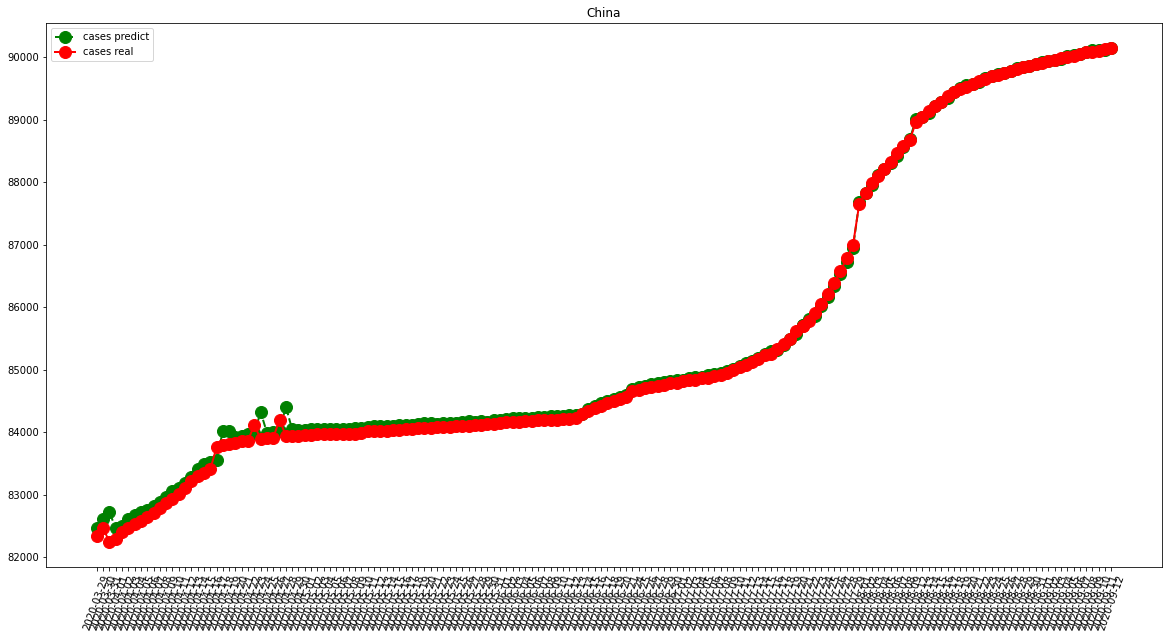

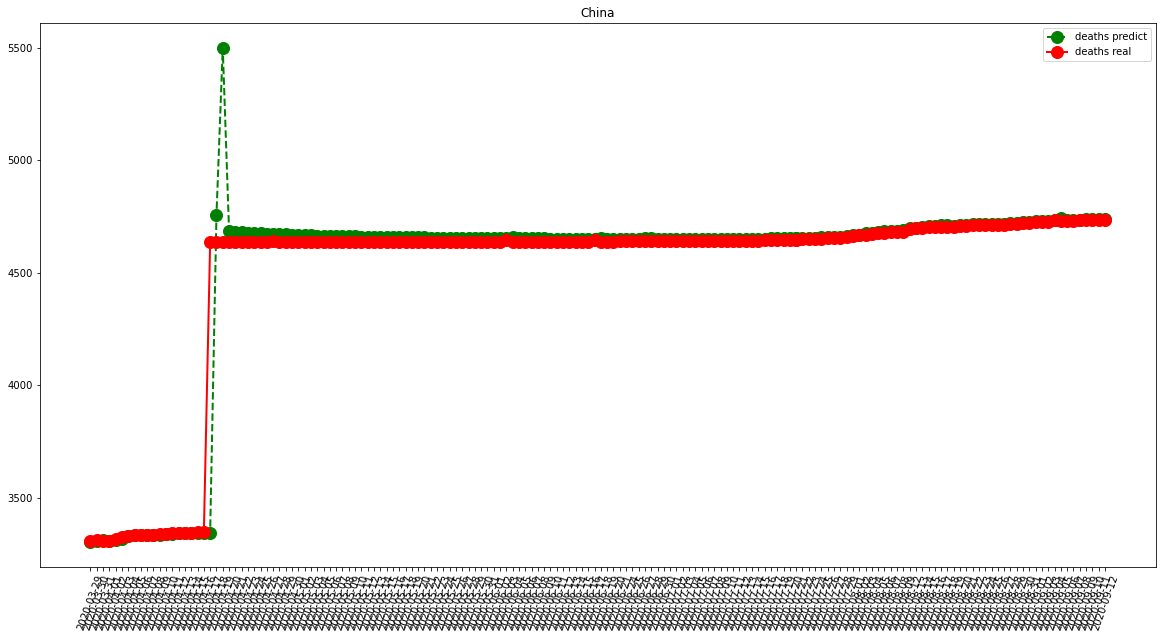

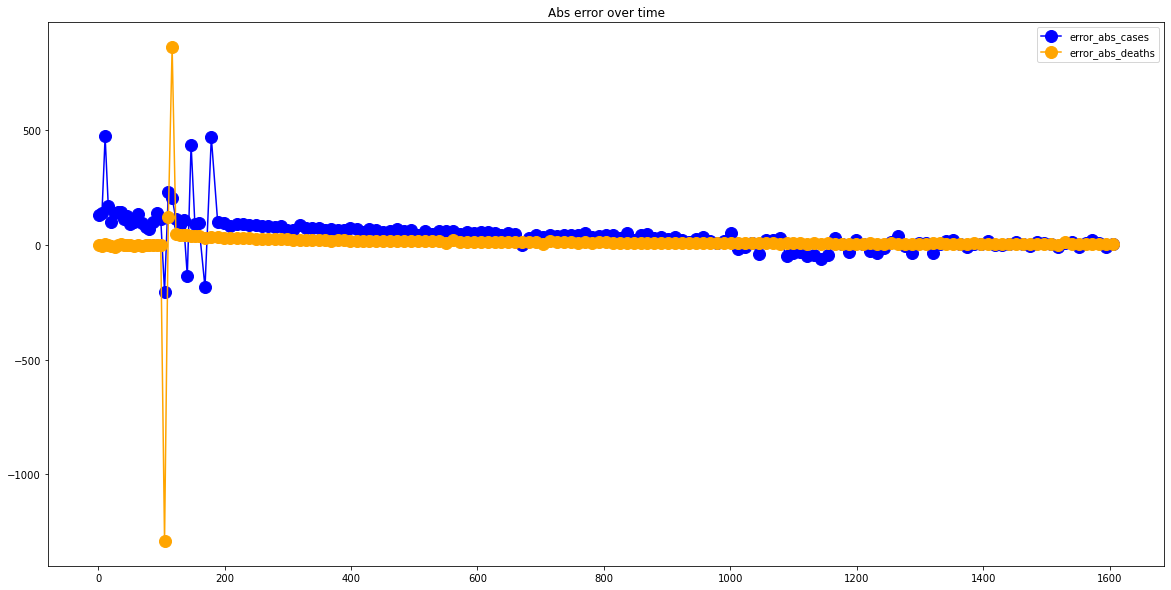

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1022.2518518518518
RMSE =  3605.5230144054563
-- United Kingdom performances for deaths --
MAE =  226.57037037037037
RMSE =  734.5613606721992


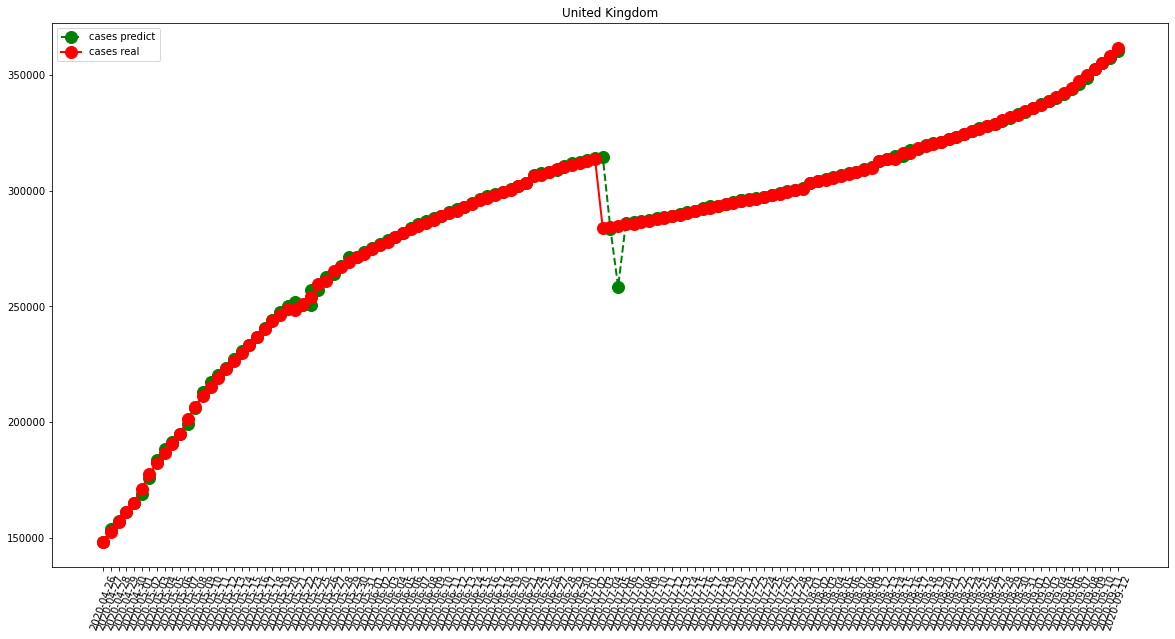

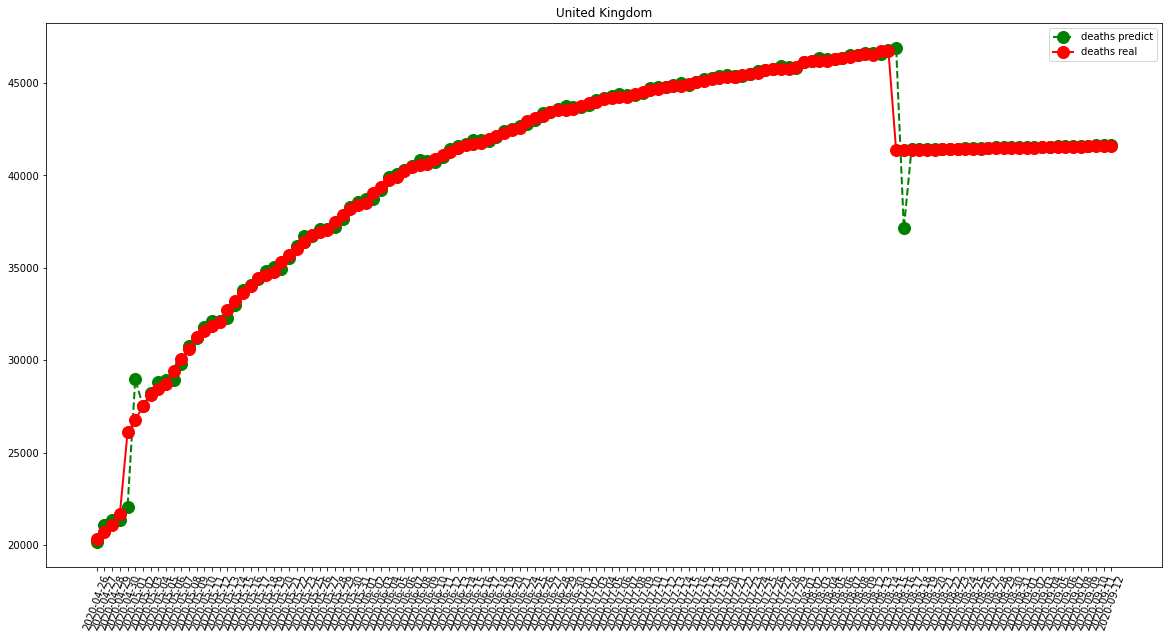

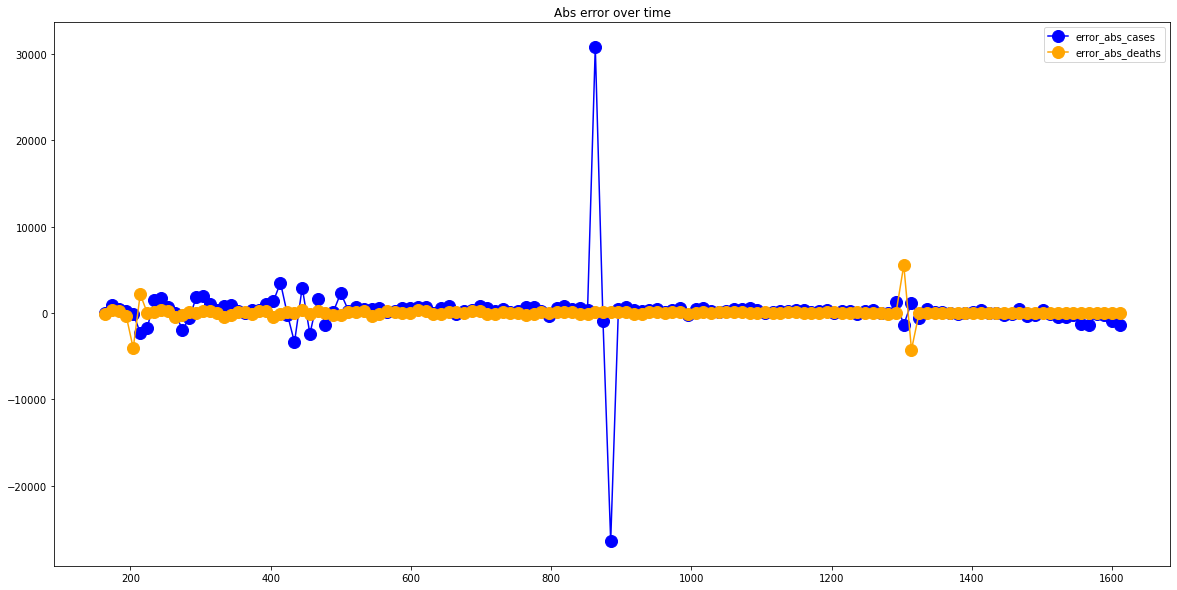

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  404.6
RMSE =  580.5114028930775
-- Germany performances for deaths --
MAE =  19.82962962962963
RMSE =  37.88823720521342


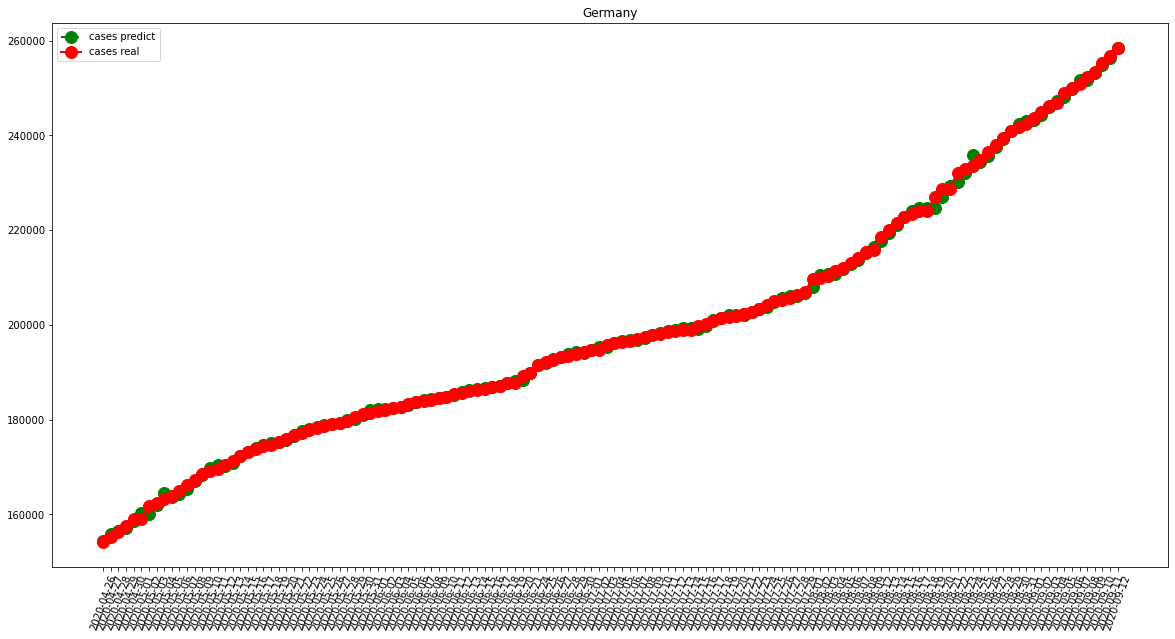

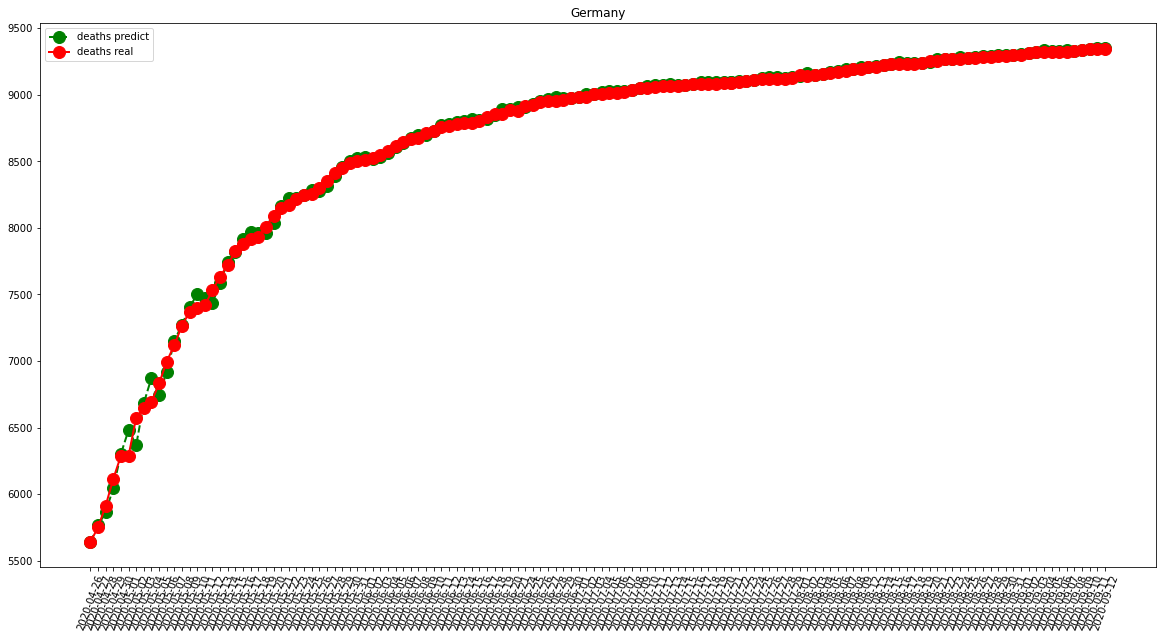

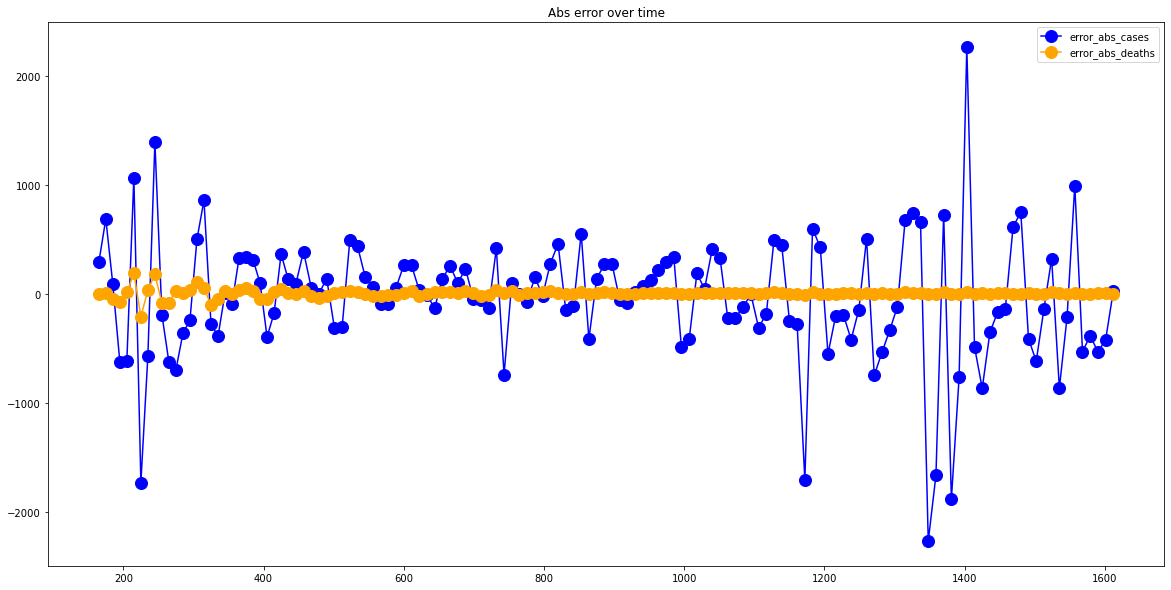

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  881.7555555555556
RMSE =  1246.3113427081385
-- Iran performances for deaths --
MAE =  50.74074074074074
RMSE =  85.97958414000901


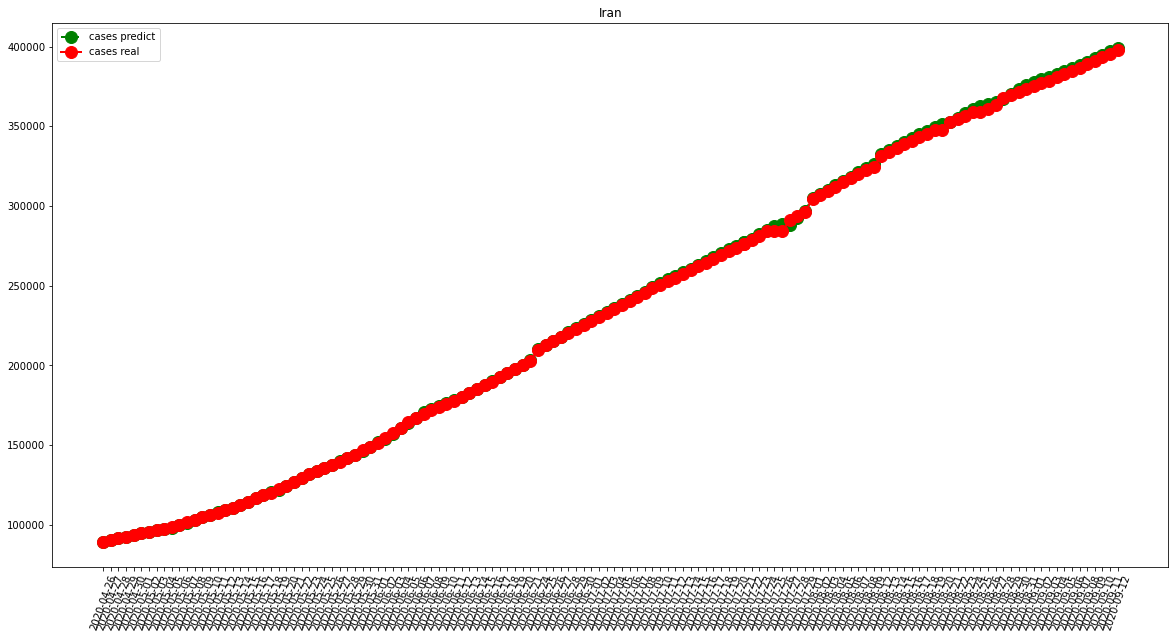

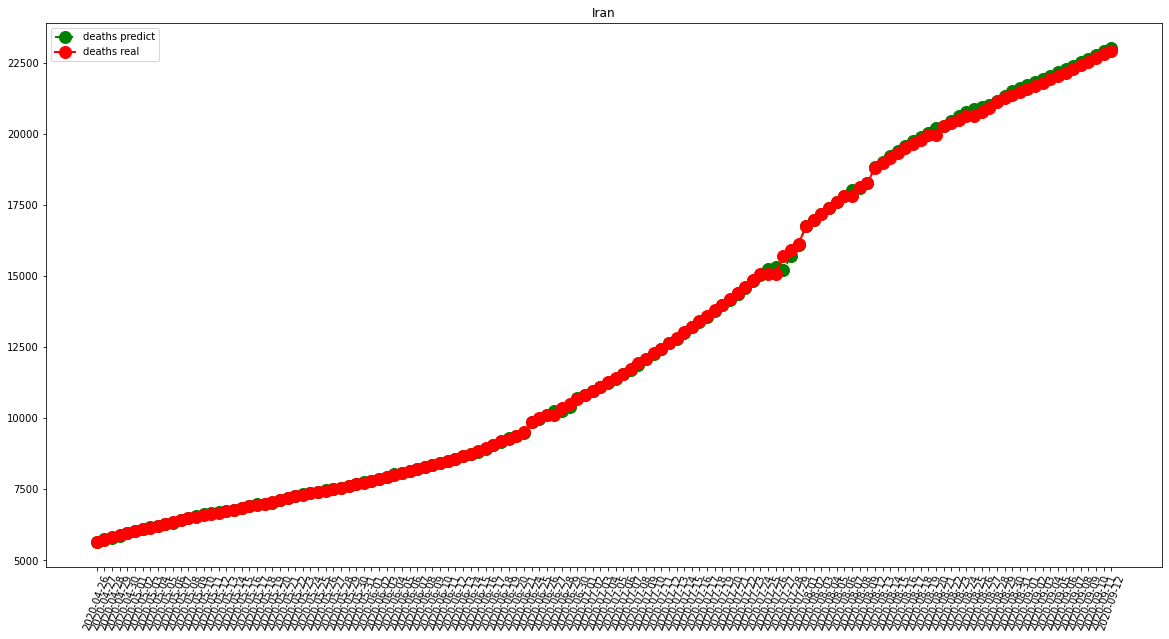

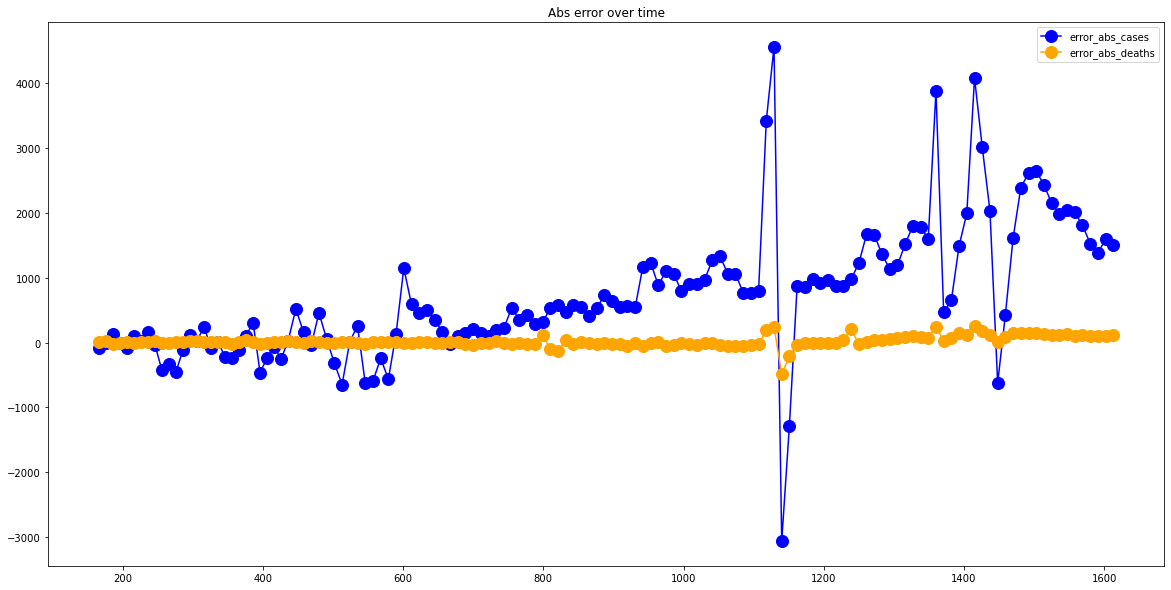

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  211.8962962962963
RMSE =  326.6936043315068
-- Turkey performances for deaths --
MAE =  16.02962962962963
RMSE =  87.50060317252422


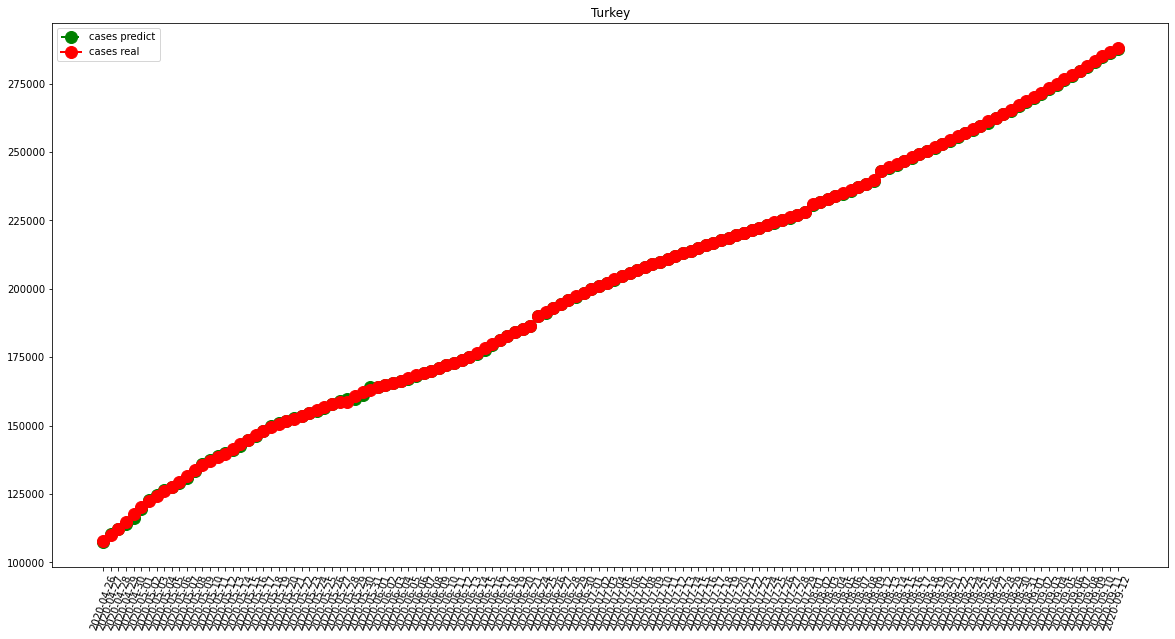

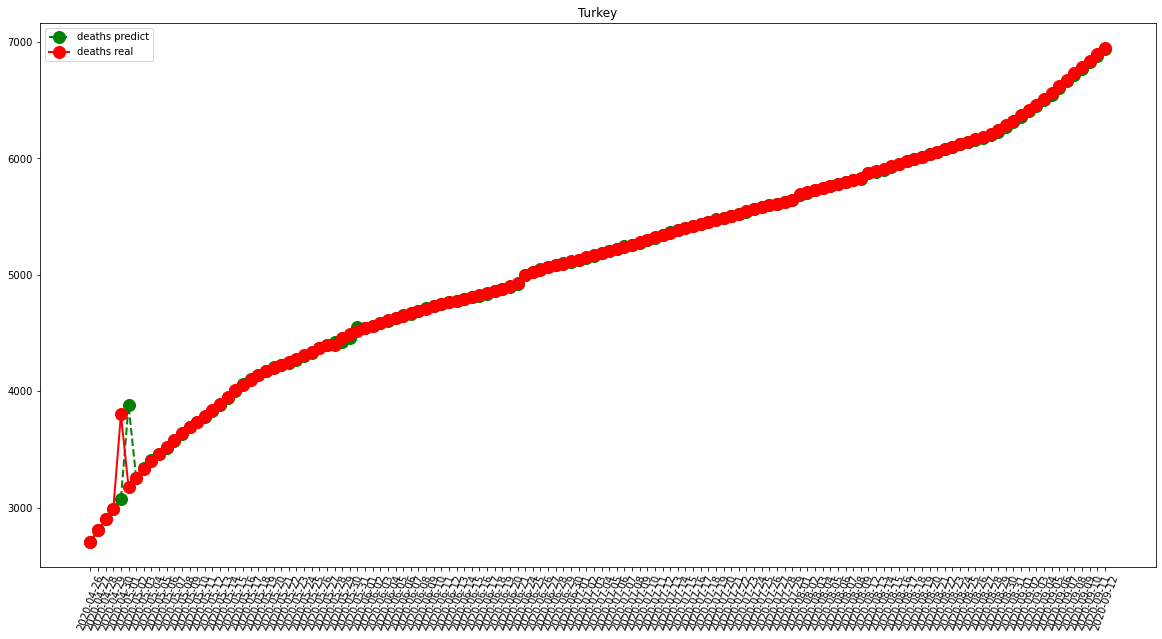

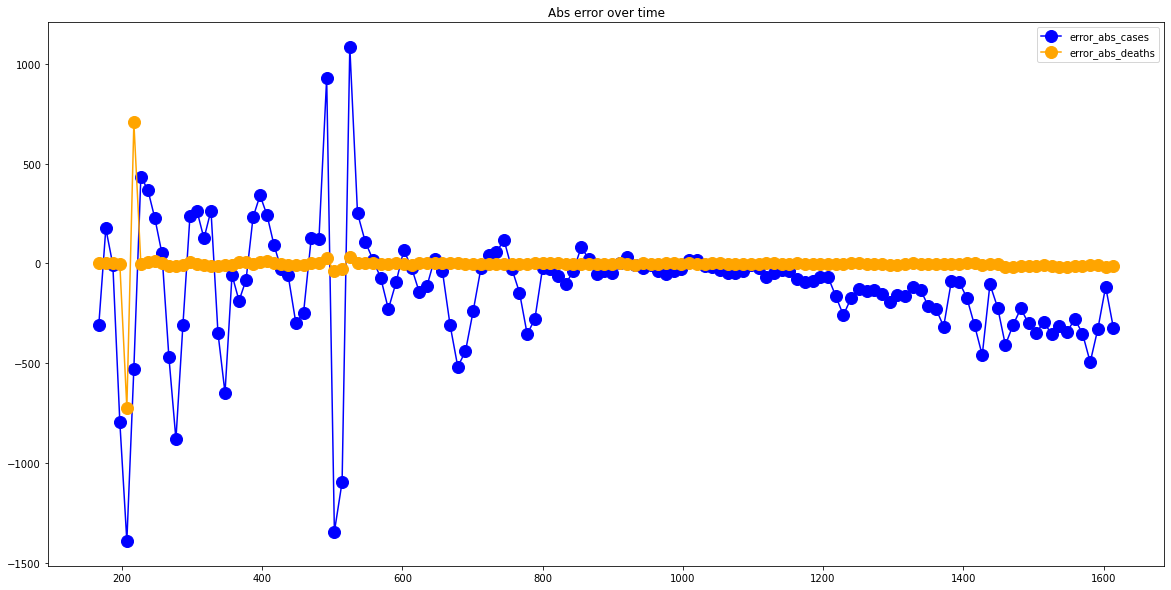

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  15321.75
RMSE =  20481.651735286283
-- Brazil performances for deaths --
MAE =  465.47222222222223
RMSE =  570.2070205603368


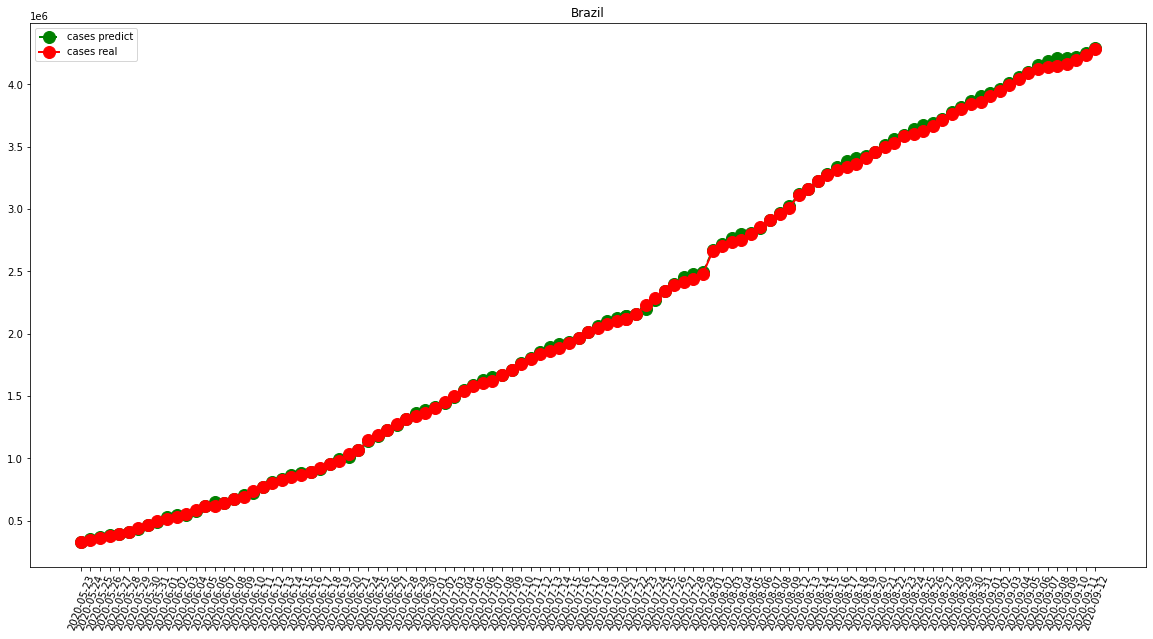

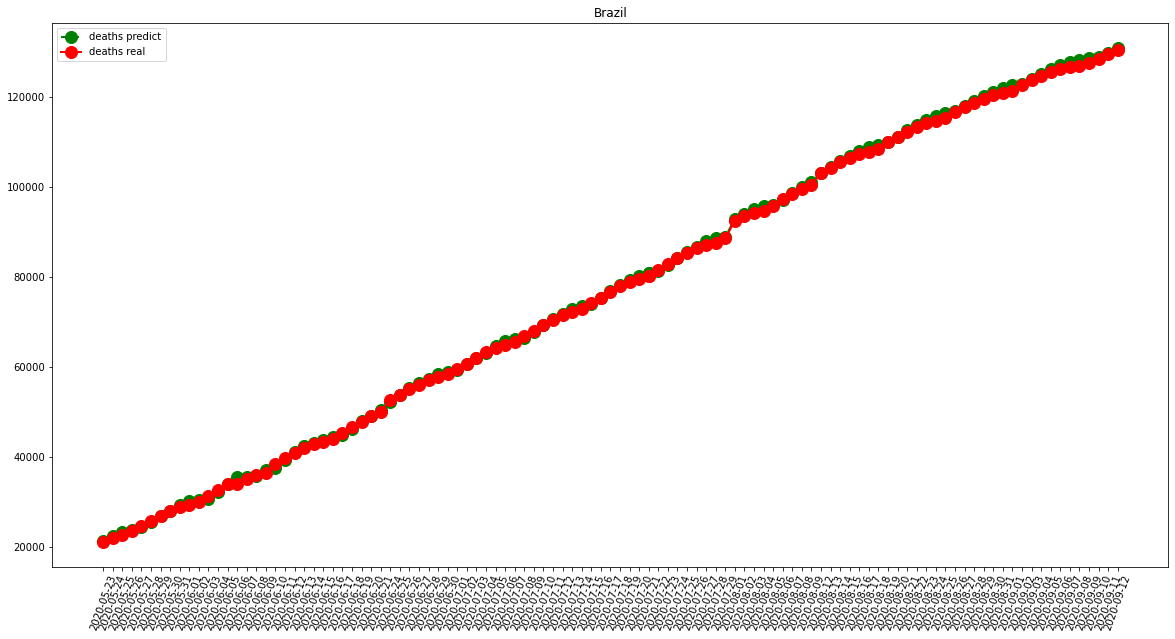

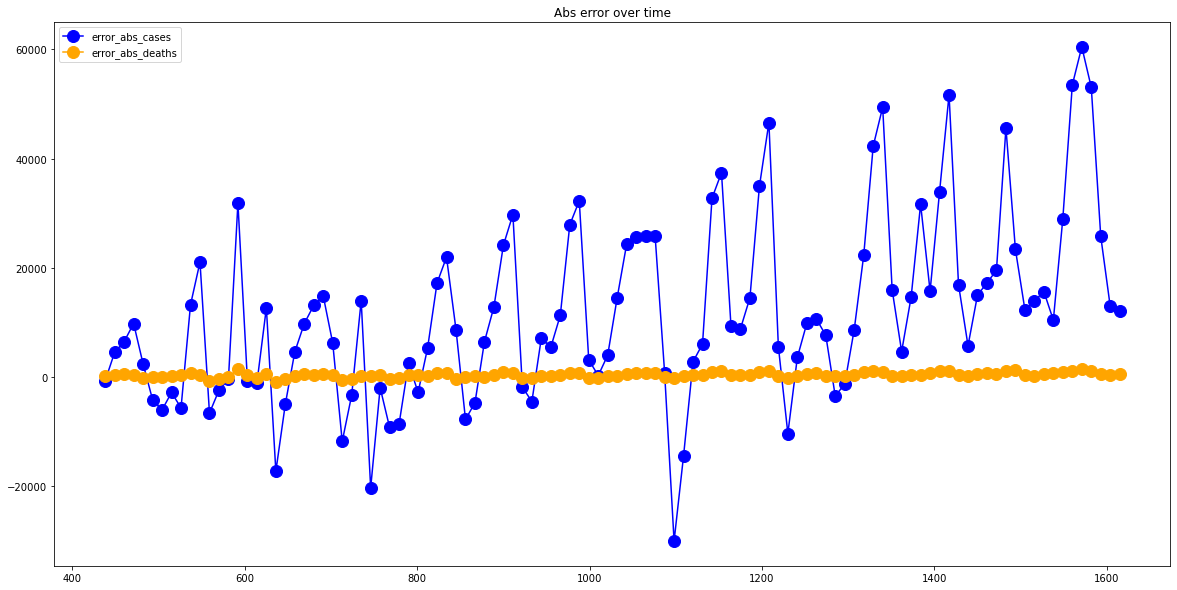

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)